import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Beste RMSE nach letzem Durchlauf, mit Lernrate 0.01: 19.09312441730204 
Beste RMSE nach letzem Durchlauf, mit Lernrate 0.05: 8.086655402155682 
Beste RMSE nach letzem Durchlauf, mit Lernrate 0.1: 7.713171206673898 
Beste RMSE nach letzem Durchlauf, mit Lernrate 1.0: 6.261582839740805 
Beste RMSE nach letzem Durchlauf, mit Lernrate 2.0: 54.662289996440094 
[-1.27595173 -0.16537916 -0.40104465 -0.33112511  0.09575642 -0.43917134]


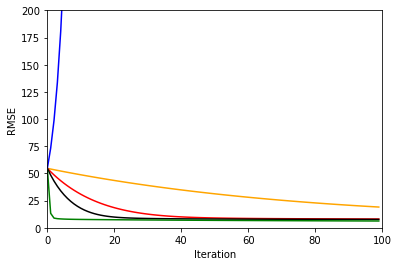

In [31]:
"""
Problem definition:

Use the new data set for this exercise cars.csv. 
The data can be read with the command cars = np.genfromtxt("cars.csv", delimiter=",", skip_header=True). In this exercise, you do not try to inference one column from another, but rather use the first 6 columns to predict the 7th column. The aim is to predict the fuel consumption of cars.

The meaning of the columns in the cars matrix:
1. "cylinders" = number of the cylinders
2. "displacement" = space in the back of the car
3. "horsepower" = power of the engine
4. "weight" = weight in pounds
5. "acceleration" = time to accelerate from 0 to 60 miles per hour
6. "model year" = release date
7. "mpg" = miles per gallon

First normalize all data, use the first 6 columns as input data and try to predict the 7th column. Evaluate your predictions with the RMSE. Since several input data/columns are now used, please replace the polynomial function with a linear combination of weighted input values. Try to find some random coefficients which create a good approximation function, just to get a feeling for the data.

Polynomial Function:
polynomial function

Weighted Function:
weighted function


Exchange your random-picking algorithm with the evolution strategy. Implement a way to define the number of offspring and generations. Make it possible to keep the parents (generation) if they are better than their children.

All children are initially a copy of their parents np.tile(...) but are modified a little bit for each coefficient. At the end of an epoch, the best descendant is determined (from the set of all children and/or parents). and used as the parent of the next epoch.

Let your best combination of coefficients predict the fuel consumption for the following four lines:
"""

# Importieren der notwendigen libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import random

%matplotlib inline

# Importieren der CSV 
cars = np.genfromtxt("cars.csv", delimiter=",", skip_header=True)


def normalizeMax(input):
    maxInput = np.amax(input)
    normalizedMax = input/maxInput
    
    return normalizedMax
                             
                                     
# y ist miles per gallon
def getWeighted(xValues, thetas):
    y = 0
    
    for i in range (len(thetas)):
    #for i in range (np.koeffizienten.Size):
        
        y = y + xValues * thetas[i]
        
    return y



# speichern der max werte für denormalization
cylindersMax = np.amax(cars[:,1])
displacementMax = np.amax(cars[:,2])
horsepowerMax = np.amax(cars[:,3])
weightMax = np.amax(cars[:,4])
accelerationMax = np.amax(cars[:,5])
modelYearMax = np.amax(cars[:,6])
mpgMax = np.amax(cars[:,7])

# Normalisieren der Daten mit normMax Funktion
cylinders = normalizeMax(cylinders)
displacement = normalizeMax(displacement)
horsepower = normalizeMax(horsepower)
weight = normalizeMax(weight)
acceleration = normalizeMax(acceleration)
modelYear = normalizeMax(modelYear)
mpg = normalizeMax(mpg)

# erzeugen der vektoren
cylindersVector = np.expand_dims(cylinders, axis=1)
displacementVector = np.expand_dims(displacement, axis=1)
horsepowerVector = np.expand_dims(horsepower, axis=1)
weightVector = np.expand_dims(weight, axis=1)
accelerationVector = np.expand_dims(acceleration, axis=1)
modelYearVector = np.expand_dims(modelYear, axis=1)

xValueMatrix = np.column_stack([cylindersVector, displacementVector, horsepowerVector, weightVector, accelerationVector, modelYearVector])

# Alpha-werte
learnRates = [0.01, 0.05, 0.1, 1.0, 2.0]

datenwertlänge = len(mpg)

# rmse array für alle durchläufe
rmseValues = [np.zeros(100), np.zeros(100), np.zeros(100), np.zeros(100), np.zeros(100)]

for i in range(len(learnRates)):
    # seed setzen, damit alle von der gleichen Position anfangen
    np.random.seed(7)
    
    # Theta Startwerte generieren --> für jede der 6 Spalten einen 
    thetaValues = np.random.rand(6, 1)
    
    smallestRMSE = float('inf')
    bestThetaValues = []

    # schleife mit n iterationen um  möglichts gute Theta Werte zu finden, Schritte aus den Slides
    for j in range(100):
        # Hypothesis
        mpgHypothesis = np.matmul(xValueMatrix, thetaValues)
        mpgHypothesis = np.squeeze(mpgHypothesis)

        # Disparity
        disparity = mpgHypothesis - mpg

        # Theta delta wete
        thetaDelta = np.matmul(np.transpose(xValueMatrix), disparity)
        thetaDelta = np.squeeze(thetaDelta)

        # Normalisieren der theta deltas
        normThetaDelta = thetaDelta * (learnRates[i] / datenwertlänge)

        # Updaten der theta werte
        newThetaValues = np.squeeze(thetaValues) - normThetaDelta
        thetaValues = newThetaValues

        # rmse
        squareErrorSum = np.sum(np.power(mpgMax * mpgHypothesis - mpgMax * mpg, 2))
        mse = squareErrorSum / len(mpg)
        rmse = math.sqrt(mse)

        # speichern der rmse des jeweiligen durchlaufs
        rmseValues[i][j] = rmse
                                     
        # kleinste rmse aktualisieren, wenn die aktuelle rmse kleiner & die besten Theta Werte aktualiseren
        if rmse < smallestRMSE:
            smallestRMSE = rmse
            bestThetaValues = newThetaValues
        
        
    print("Beste RMSE nach letzem Durchlauf, mit Lernrate {}: {} ".format(learnRates[i], smallestRMSE))
    
# die besten Theta-werte anzeigen
bestThetaValuesArray = np.squeeze(bestThetaValues)
print(bestThetaValues)

xValues = np.arange(0, 100, 1)

plt.xlabel("Iteration")
plt.ylabel("RMSE")

plt.xlim([0, 100])
plt.ylim([0, 200])

plt.plot(xValues, rmseValues[0], color = "orange")
plt.plot(xValues, rmseValues[1], color = "red")
plt.plot(xValues, rmseValues[2], color = "black")
plt.plot(xValues, rmseValues[3], color = "green")
plt.plot(xValues, rmseValues[4], color = "blue")